In [30]:
import pandas as pd
import numpy as np
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
import statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sktime.forecasting.compose import EnsembleForecaster
import matplotlib.pyplot as plt

# Problem Statement

Can we make a good forcast of the month of april only given one variable for 2020?

In [3]:
c2020 = pd.read_csv('data/2020consumption.csv', parse_dates=True)

In [72]:
train = c2020[(c2020['date_time'] < '2020-08-01')]
train['date_time'] = pd.to_datetime(train['date_time'])
train = train.set_index('date_time')
train.index = train.index.to_period('D')
train = train.resample('D').mean().fillna(0)

<ipython-input-72-8cacd72f4794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_time'] = pd.to_datetime(train['date_time'])


In [73]:
test = c2020[(c2020['date_time'] > '2020-08-01')]
test['date_time'] = pd.to_datetime(test['date_time'])
test = test.set_index('date_time')
test.index = test.index.to_period('T')
test = test.resample('D').mean().fillna(0)

<ipython-input-73-efc70dadaa0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date_time'] = pd.to_datetime(test['date_time'])


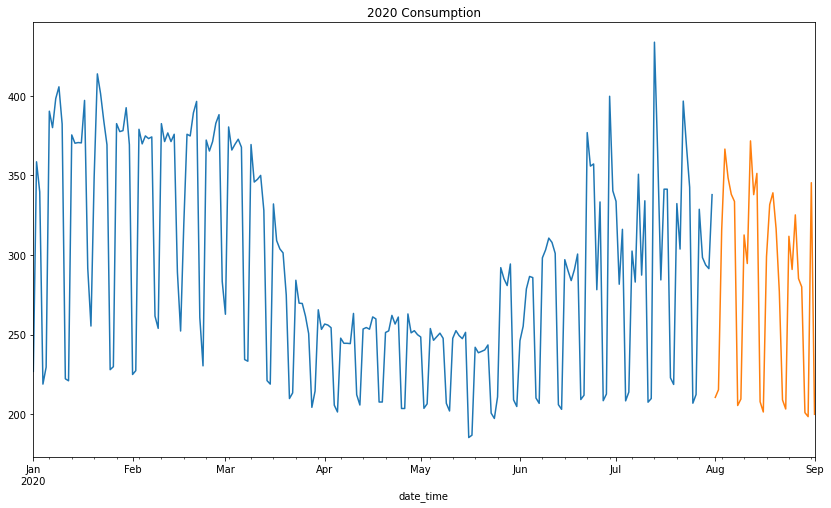

In [74]:
train['consumption'].plot()
test['consumption'].plot(figsize=(14, 8), title='2020 Consumption');
plt.savefig('TrainTest.png')

## Consumption forcast for 2020

In [15]:
df_predictions = test.copy()

In [16]:
df_predictions

,consumption
date_time,
2020-08-01,210.625000
2020-08-02,215.416667
2020-08-03,315.520833
2020-08-04,366.526316
2020-08-05,348.437500
2020-08-06,338.125000
2020-08-07,333.645833
2020-08-08,205.520833
2020-08-09,209.583333


In [17]:
df_predictions['simple_mean'] = train['consumption'].mean()

In [18]:
round(mean_squared_error(df_predictions['consumption'], df_predictions['simple_mean'], squared=False), 2)

60.02

In [19]:
holt = Holt(train['consumption'], exponential=False).fit()

C:\Users\hamma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [24]:
holt_forecast = holt.forecast(len(test))

In [25]:
holt_forecast

2020-08-01    338.568189
2020-08-02    342.432963
2020-08-03    346.297737
2020-08-04    350.162510
2020-08-05    354.027284
2020-08-06    357.892057
2020-08-07    361.756831
2020-08-08    365.621604
2020-08-09    369.486378
2020-08-10    373.351152
2020-08-11    377.215925
2020-08-12    381.080699
2020-08-13    384.945472
2020-08-14    388.810246
2020-08-15    392.675019
2020-08-16    396.539793
2020-08-17    400.404567
2020-08-18    404.269340
2020-08-19    408.134114
2020-08-20    411.998887
2020-08-21    415.863661
2020-08-22    419.728434
2020-08-23    423.593208
2020-08-24    427.457982
2020-08-25    431.322755
2020-08-26    435.187529
2020-08-27    439.052302
2020-08-28    442.917076
2020-08-29    446.781849
2020-08-30    450.646623
2020-08-31    454.511396
2020-09-01    458.376170
Freq: D, dtype: float64

In [26]:
df_predictions['holt'] = holt.forecast(len(test))

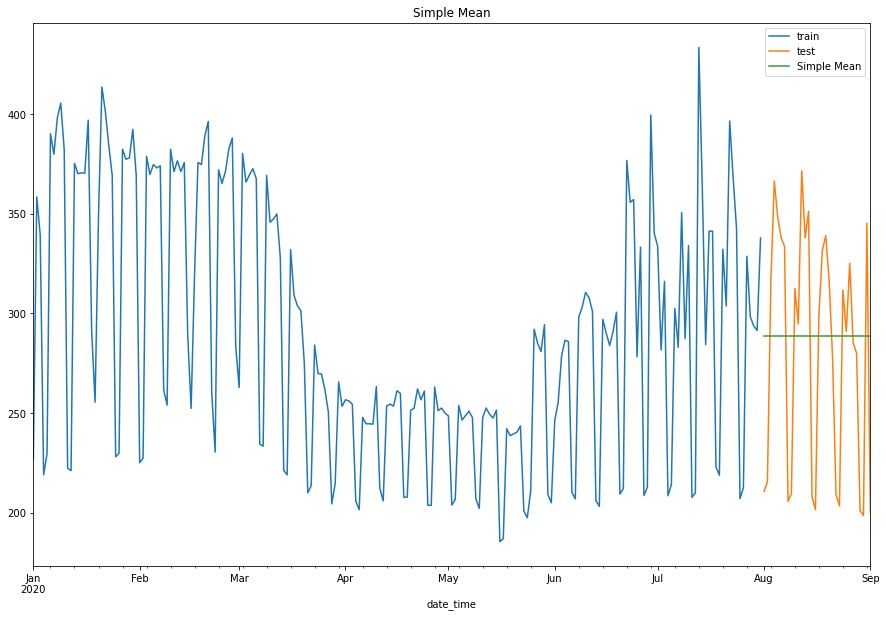

In [76]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
plt.plot(df_predictions['simple_mean'], label="Simple Mean")
plt.legend(loc='best')
plt.title("Simple Mean");
plt.savefig('TrainTestMean.png')

In [27]:
test

,consumption
date_time,
2020-08-01,210.625000
2020-08-02,215.416667
2020-08-03,315.520833
2020-08-04,366.526316
2020-08-05,348.437500
2020-08-06,338.125000
2020-08-07,333.645833
2020-08-08,205.520833
2020-08-09,209.583333


In [28]:
df_predictions

,consumption,simple_mean,holt
date_time,,,
2020-08-01,210.625000,288.678229,338.568189
2020-08-02,215.416667,288.678229,342.432963
2020-08-03,315.520833,288.678229,346.297737
2020-08-04,366.526316,288.678229,350.162510
2020-08-05,348.437500,288.678229,354.027284
2020-08-06,338.125000,288.678229,357.892057
2020-08-07,333.645833,288.678229,361.756831
2020-08-08,205.520833,288.678229,365.621604
2020-08-09,209.583333,288.678229,369.486378


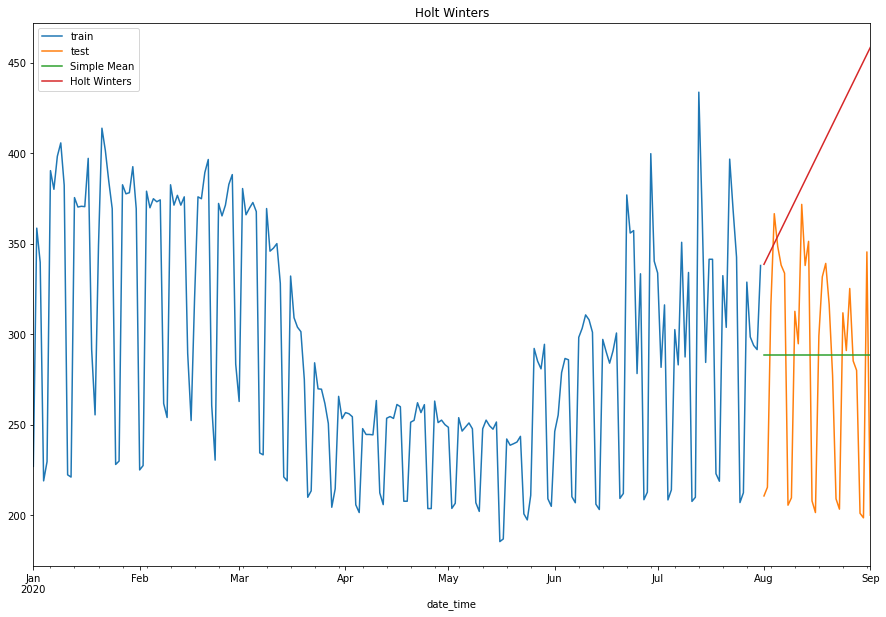

In [77]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
plt.plot(df_predictions['simple_mean'], label="Simple Mean")
plt.plot(df_predictions['holt'], label="Holt Winters")
plt.legend(loc='best')
plt.title("Holt Winters");
plt.savefig('TrainTestMeanWinters.png')

In [46]:
round(mean_squared_error(df_predictions['consumption'], holt_forecast, squared=False), 2)

138.31

In [47]:
hw = ExponentialSmoothing(
    train['consumption'],
    seasonal_periods=7,
    trend='mul',
    seasonal='add'
).fit()

C:\Users\hamma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hamma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [48]:
hw.summary()

Dep. Variable:,consumption,No. Observations:,213
Model:,ExponentialSmoothing,SSE,151196.595
Optimized:,True,AIC,1420.354
Trend:,Multiplicative,BIC,1457.329
Seasonal:,Additive,AICC,1422.184
Seasonal Periods:,7,Date:,"Wed, 03 Mar 2021"
Box-Cox:,False,Time:,22:15:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2752009,alpha,True
smoothing_trend,0.000000,beta,True


In [49]:
df_predictions['hw'] = hw.forecast(len(test))
df_predictions

,consumption,simple_mean,holt,hw
date_time,,,,
2020-08-01,210.625000,288.678229,338.568189,189.487199
2020-08-02,215.416667,288.678229,342.432963,196.265497
2020-08-03,315.520833,288.678229,346.297737,332.110268
2020-08-04,366.526316,288.678229,350.162510,301.327145
2020-08-05,348.437500,288.678229,354.027284,317.581807
2020-08-06,338.125000,288.678229,357.892057,306.381993
2020-08-07,333.645833,288.678229,361.756831,309.560205
2020-08-08,205.520833,288.678229,365.621604,189.020100
2020-08-09,209.583333,288.678229,369.486378,195.798504


In [50]:
round(mean_squared_error(df_predictions['consumption'], df_predictions['hw'], squared=False), 2)

31.17

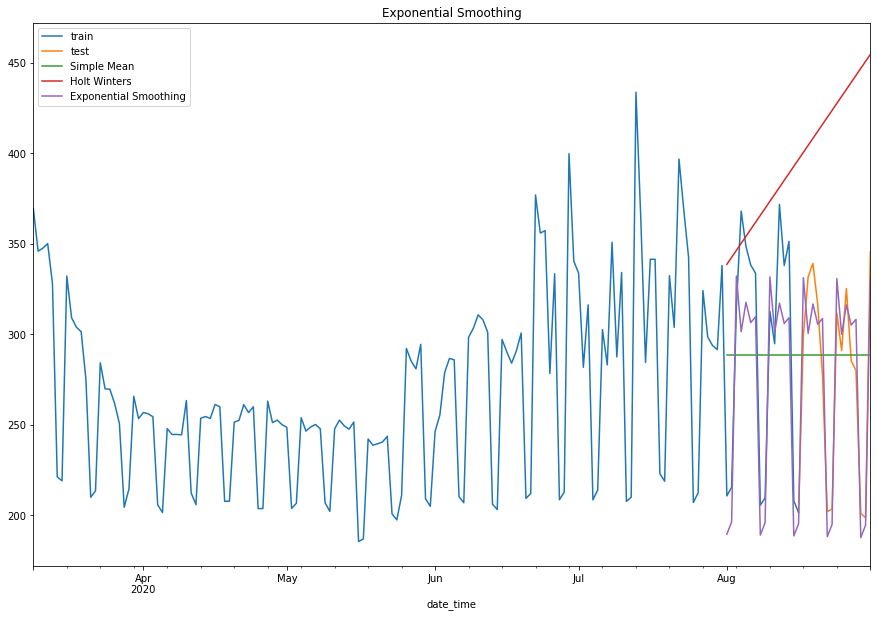

In [111]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
plt.plot(df_predictions['simple_mean'], label="Simple Mean")
plt.plot(df_predictions['holt'], label="Holt Winters")
plt.plot(df_predictions['hw'], label="Exponential Smoothing")
plt.legend(loc='best')
plt.title("Exponential Smoothing");
plt.savefig('TrainTestMeanExponential.png')

In [52]:
hw_model = AutoETS(auto=True, sp=7)

In [53]:
traindf1 = train.consumption.astype('float64')

In [54]:
traindf1

date_time
2020-01-01    226.979167
2020-01-02    358.541667
2020-01-03    339.687500
2020-01-04    218.958333
2020-01-05    229.583333
                 ...    
2020-07-27    328.736842
2020-07-28    298.437500
2020-07-29    293.750000
2020-07-30    291.458333
2020-07-31    337.916667
Freq: D, Name: consumption, Length: 213, dtype: float64

In [55]:
hw_model.fit(traindf1)

AutoETS(auto=True, sp=7)

In [56]:
hw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:            consumption   No. Observations:                  213
Model:                      ETS(MAdM)   Log Likelihood                -972.846
Date:                Wed, 03 Mar 2021   AIC                           1973.693
Time:                        22:17:06   BIC                           2020.751
Sample:                    01-01-2020   HQIC                          1992.711
                         - 07-31-2020   Scale                            0.007
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.2621      0.069      3.817      0.000       0.128       0.397
smoothing_trend     2.621e-05      0.024      0.001      0.999      -0.047       0.047
smoothing_seasonal     0.3615      0.054      6.736      0.000       0.256       0.467
damping_trend          0.8000      0.093      8.612      0.000       0.618       0.982
initial_level        202.3983   1275.283      0.159      0.874   -2297.111    2701.908
initial_trend         51.5416    326.323      0.158      0.874    -588.040     691.124
initial_seasonal.0     1.0444      6.578      0.159      0.874     -11.848      13.937
initial_seasonal.1     1.0505      6.617      0.159      0.874     -11.918      14.019
initial_seasonal.2     0.6506      4.098      0.159      0.874      -7.380       8.682
initial_seasonal.3     0.6927      4.363      0.159      0.874      -7.858       9.244
initial_seasonal.4     1.0807      6.806      0.159      0.874     -12.260      14.421
initial_seasonal.5     1.1713      7.377      0.159      0.874     -13.288      15.630
initial_seasonal.6     1.0000      6.298      0.159      0.874     -11.344      13.344
===================================================================================
Ljung-Box (Q):                       22.12   Jarque-Bera (JB):                84.06
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [57]:
df_predictions['hwes'] = hw_model.predict(list(range(1, len(test)+1)))

In [58]:
round(mean_squared_error(df_predictions['consumption'], df_predictions['hwes'], squared=False), 1)

30.9

In [ ]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
plt.plot(df_predictions['simple_mean'], label="Simple Mean")
plt.plot(df_predictions['holt'], label="Holt Winters")
plt.plot(df_predictions['hw'], label="Exponential Smoothing")

plt.legend(loc='best')
plt.title("Naive Forecast");

In [59]:
hw_manual = AutoETS(error='add', trend='add', seasonal='mul', sp=7, suppress_warnings=True)

In [60]:
hw_manual.fit(traindf1)

AutoETS(seasonal='mul', sp=7, trend='add')

In [61]:
hw_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:            consumption   No. Observations:                  213
Model:                       ETS(AAM)   Log Likelihood                -995.771
Date:                Wed, 03 Mar 2021   AIC                           2017.543
Time:                        22:17:47   BIC                           2061.239
Sample:                    01-01-2020   HQIC                          2035.202
                         - 07-31-2020   Scale                          673.231
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.2000      0.047      4.281      0.000       0.108       0.292
smoothing_trend        0.0180      0.007      2.584      0.010       0.004       0.032
smoothing_seasonal     0.1687      0.070      2.414      0.016       0.032       0.306
initial_level        312.5962   2605.116      0.120      0.904   -4793.338    5418.531
initial_trend          5.3238     44.491      0.120      0.905     -81.876      92.524
initial_seasonal.0     1.0166      8.472      0.120      0.904     -15.588      17.621
initial_seasonal.1     0.9952      8.294      0.120      0.904     -15.261      17.251
initial_seasonal.2     0.6595      5.496      0.120      0.904     -10.113      11.432
initial_seasonal.3     0.6908      5.757      0.120      0.904     -10.593      11.975
initial_seasonal.4     1.0118      8.432      0.120      0.904     -15.515      17.538
initial_seasonal.5     1.0243      8.537      0.120      0.904     -15.708      17.757
initial_seasonal.6     1.0000      8.334      0.120      0.904     -15.334      17.334
===================================================================================
Ljung-Box (Q):                       19.18   Jarque-Bera (JB):               104.75
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.65
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [62]:
df_predictions['hwman'] = hw_manual.predict(list(range(1, len(test)+1)))

In [63]:
round(mean_squared_error(df_predictions['consumption'], df_predictions['hwman'], squared=False), 0)

32.0

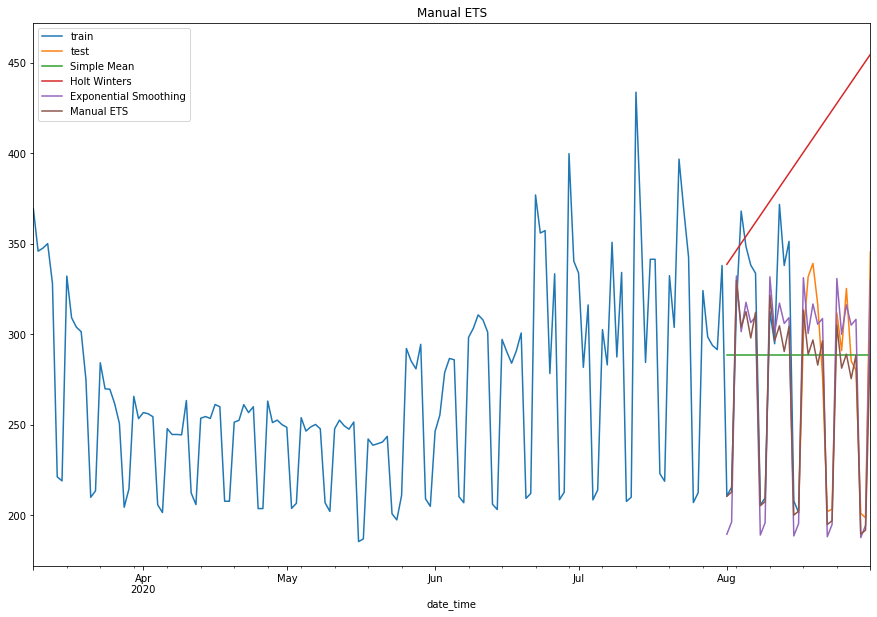

In [110]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
plt.plot(df_predictions['simple_mean'], label="Simple Mean")
plt.plot(df_predictions['holt'], label="Holt Winters")
plt.plot(df_predictions['hw'], label="Exponential Smoothing")
plt.plot(df_predictions['hwman'], label="Manual ETS")
plt.legend(loc='best')
plt.title("Manual ETS")
plt.savefig('TrainTestMeanManual.png')

# Multivariate

In [82]:
m = pd.read_csv('data/multicon2020.csv', parse_dates=True)

In [83]:
m['date_time'] = pd.to_datetime(m['date_time'])

In [84]:
m = m.set_index('date_time')

In [85]:
m.index = m.index.to_period('D')

In [86]:
m

,consumption,avg_demand,temp,humidity,entries
date_time,,,,,
2020-03-09,369.375000,1476.666667,57.816667,28.250000,1743.0
2020-03-10,345.833333,1383.541667,60.050000,48.829167,1607.0
2020-03-11,347.500000,1390.000000,50.995833,44.195833,1573.0
2020-03-12,350.000000,1400.208333,46.583333,63.291667,1259.0
2020-03-13,328.020833,1312.291667,55.754167,65.054167,704.0
...,...,...,...,...,...
2020-08-27,285.208333,1140.833333,76.775000,58.666667,206.0
2020-08-28,280.000000,1120.000000,75.950000,70.333333,169.0
2020-08-29,201.041667,804.166667,75.050000,82.791667,0.0


In [87]:
train = m.loc[:'2020-08-16']

In [88]:
test = m.loc['2020-08-16':]

In [89]:
len(test)

16

In [90]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pmd
from pmdarima.utils import tsdisplay
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='date_time'>

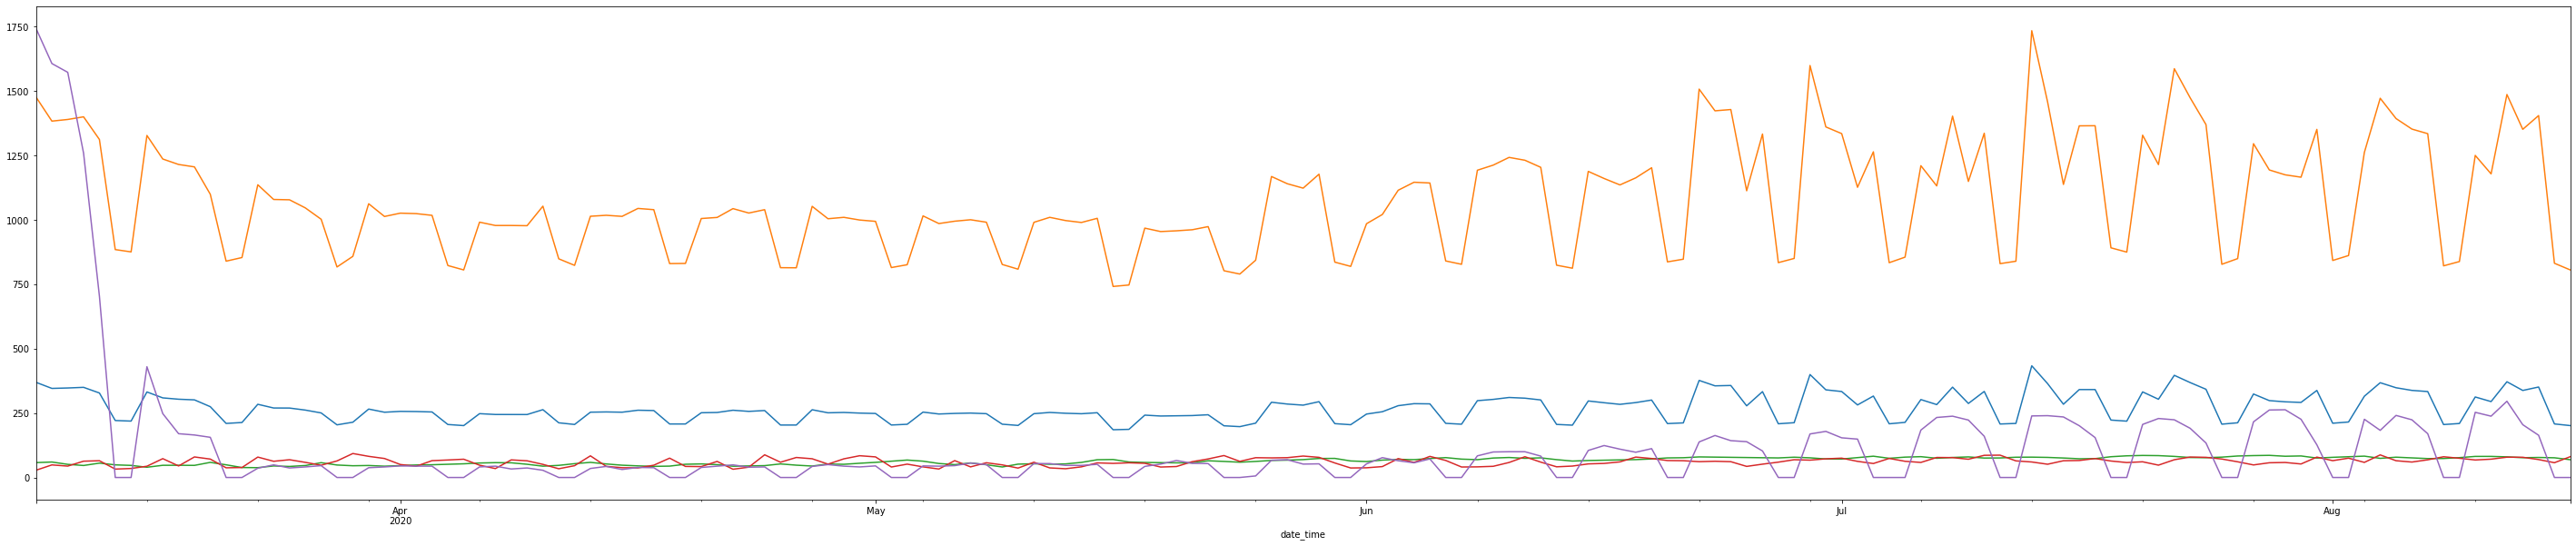

In [91]:
fig, ax = plt.subplots(figsize=(50, 10))
train['consumption'].plot()
train['avg_demand'].plot()
train['temp'].plot()
train['humidity'].plot()
train['entries'].plot()

In [92]:
dtrain = train.diff()
dtrain = dtrain.dropna()

# SARIMA

In [102]:
model = pmd.auto_arima(train['consumption'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1745.478, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1602.612, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1649.652, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1743.535, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1743.513, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1552.475, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1685.125, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1543.554, Time=0.50 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1544.635, Time=0.56 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1545.886, Time=0.52 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=1558.410, Time=0.31 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=1530.000, Time=0.58 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=1

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  161
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 7)   Log Likelihood                -748.958
Date:                           Wed, 03 Mar 2021   AIC                           1511.915
Time:                                   22:38:10   BIC                           1533.442
Sample:                                        0   HQIC                          1520.656
                                           - 161                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0439      0.137     -0.321      0.748      -0.312       0.224
ar.L1          0.3012      0.095      3.184      0.001       0.116       0.487
ma.L1         -0.8874      0.058    -15.224      0.000      -1.002      -0.773
ar.S.L7        0.5533      0.106      5.226      0.000       0.346       0.761
ar.S.L14       0.3960      0.087      4.559      0.000       0.226       0.566
ma.S.L7       -0.2652      0.113     -2.356      0.018      -0.486      -0.045
sigma2       625.1637     54.973     11.372      0.000     517.419     732.908
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                52.42
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.58   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
preds = model.predict(test.shape[0])
preds

array([309.86677558, 327.97846279, 343.83556756, 328.55490015,
       335.3835694 , 211.62474146, 212.35929023, 310.04483046,
       311.9952435 , 350.91553313, 328.95011045, 337.92068721,
       212.6155083 , 210.39930463, 307.31424163, 315.50277626])

In [105]:
s_preds = test.copy()

In [106]:
s_preds['sarima_auto'] = preds

In [107]:
rmse_sarima = np.round(mean_squared_error(test['consumption'], s_preds['sarima_auto'], squared=False), 0)
rmse_sarima

57.0

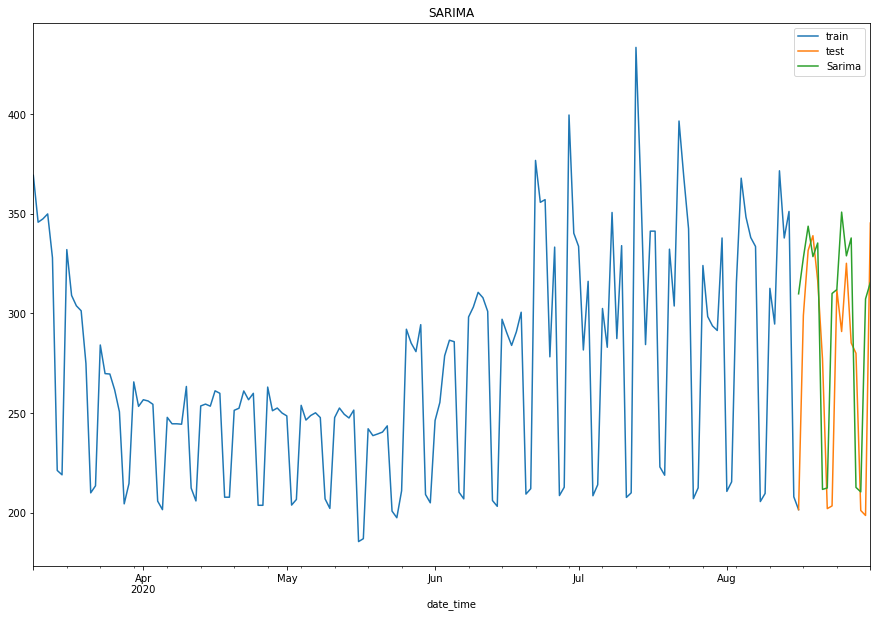

In [137]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
s_preds['sarima_auto'].plot(label='Sarima')
plt.legend(loc='best')
plt.title("SARIMA")
plt.savefig('SARIMA.png')

# SARIMAX

In [131]:
model_b = pmd.auto_arima(train['consumption'], X=train[['temp', 'humidity', 'entries']], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=1514.473, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1668.535, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1553.810, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1606.291, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1720.877, Time=0.13 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=1568.236, Time=0.69 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=1503.349, Time=1.13 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=1509.526, Time=0.99 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=1505.280, Time=1.22 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(1,0,2)(2,0,1)[7] intercept   : AIC=1522.225, Time=1.03 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=1505.239, Time=1.04 sec
 ARIMA(3,0,2)(2,0,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,0,3)(2,0,1)[7] intercept   : AIC=inf, T

In [132]:
preds_b = model_b.predict(test.shape[0], test[['temp', 'humidity', 'entries']])

In [133]:
s_preds['sarimax'] = preds_b

In [134]:
rmse_sarima = np.round(mean_squared_error(test['consumption'], s_preds['sarimax'], squared=False), 0)
rmse_sarima

55.0

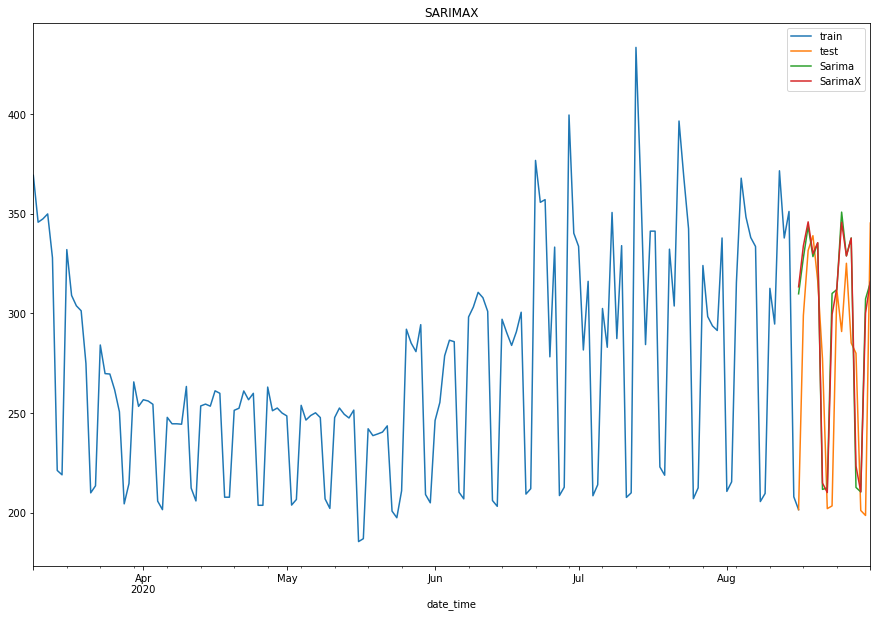

In [136]:
plt.figure(figsize=(15,10))
train['consumption'].plot(label='train')
test['consumption'].plot(label="test")
s_preds['sarima_auto'].plot(label='Sarima')
s_preds['sarimax'].plot(label='SarimaX')
plt.legend(loc='best')
plt.title("SARIMAX")
plt.savefig('SARIMAX.png')

In [54]:
train

,consumption,avg_demand,temp,humidity,entries
date_time,,,,,
2020-03-09,369.375000,1476.666667,57.816667,28.250000,1743.0
2020-03-10,345.833333,1383.541667,60.050000,48.829167,1607.0
2020-03-11,347.500000,1390.000000,50.995833,44.195833,1573.0
2020-03-12,350.000000,1400.208333,46.583333,63.291667,1259.0
2020-03-13,328.020833,1312.291667,55.754167,65.054167,704.0
...,...,...,...,...,...
2020-08-12,371.666667,1486.875000,80.075000,78.833333,296.0
2020-08-13,337.916667,1351.666667,76.850000,78.458333,205.0
2020-08-14,351.250000,1405.000000,77.750000,69.625000,164.0


# Neural Net

In [112]:
m

,consumption,avg_demand,temp,humidity,entries
date_time,,,,,
2020-03-09,369.375000,1476.666667,57.816667,28.250000,1743.0
2020-03-10,345.833333,1383.541667,60.050000,48.829167,1607.0
2020-03-11,347.500000,1390.000000,50.995833,44.195833,1573.0
2020-03-12,350.000000,1400.208333,46.583333,63.291667,1259.0
2020-03-13,328.020833,1312.291667,55.754167,65.054167,704.0
...,...,...,...,...,...
2020-08-27,285.208333,1140.833333,76.775000,58.666667,206.0
2020-08-28,280.000000,1120.000000,75.950000,70.333333,169.0
2020-08-29,201.041667,804.166667,75.050000,82.791667,0.0


In [113]:
X = m[['consumption']]
X['entries'] = m[['entries']]

<ipython-input-113-3e6c3eb0d787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['entries'] = m[['entries']]


In [114]:
X

,consumption,entries
date_time,,
2020-03-09,369.375000,1743.0
2020-03-10,345.833333,1607.0
2020-03-11,347.500000,1573.0
2020-03-12,350.000000,1259.0
2020-03-13,328.020833,704.0
...,...,...
2020-08-27,285.208333,206.0
2020-08-28,280.000000,169.0
2020-08-29,201.041667,0.0


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X[['consumption']], X.entries, shuffle = False)

In [116]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [117]:
X_rs = sscaler.fit_transform(X_train)
X_ss = sscaler.transform(X_test)

In [118]:
training_sequences = TimeseriesGenerator(X_train, y_train, length = 5, batch_size = 64)

In [119]:
x1, y1 = training_sequences[0]

In [120]:
x1.shape

(64, 5, 1)

In [121]:
test_sequences = TimeseriesGenerator(X_test, y_test, length = 3, batch_size=24)

In [122]:
model = Sequential()
model.add(SimpleRNN(40, input_shape = (5, 1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

In [123]:
model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

In [124]:
history = model.fit(training_sequences, validation_data=test_sequences, epochs = 100, verbose = 0)

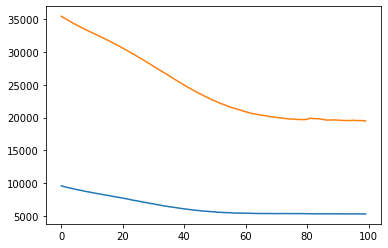

In [125]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [71]:
history.history

{'loss': [9547.6650390625,
  9452.5009765625,
  9363.1201171875,
  9291.400390625,
  9210.1416015625,
  9119.4638671875,
  9042.1357421875,
  8977.564453125,
  8901.51953125,
  8826.3984375,
  8751.1318359375,
  8663.2646484375,
  8587.6044921875,
  8509.9931640625,
  8443.546875,
  8361.7236328125,
  8265.53125,
  8197.734375,
  8098.79150390625,
  8014.5126953125,
  7928.83056640625,
  7857.81396484375,
  7768.38720703125,
  7662.25048828125,
  7574.1728515625,
  7502.8583984375,
  7411.826171875,
  7321.30517578125,
  7231.42529296875,
  7142.33642578125,
  7035.47705078125,
  6950.8505859375,
  6866.8642578125,
  6783.83642578125,
  6722.2314453125,
  6619.04248046875,
  6561.79443359375,
  6483.0859375,
  6386.8037109375,
  6337.30810546875,
  6266.45361328125,
  6198.77587890625,
  6114.1328125,
  6076.1435546875,
  6017.33740234375,
  5942.2373046875,
  5893.2333984375,
  5846.80712890625,
  5822.5458984375,
  5759.56103515625,
  5722.0439453125,
  5687.162109375,
  5673.0922851

# Conclusion

Holt-Winters exponential smoothing did a lot better, have a mean squared error of 31 doing around 50% better than the null.